<a href="https://colab.research.google.com/github/Krittipoom/FOR-fake-or-real-dataset-classification/blob/main/Part3%20Data%20preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library and Github repo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from PIL import Image
from google.colab import files
pd.set_option('mode.chained_assignment', None)

In [ ]:
!git clone https://github.com/Krittipoom/exhibition-visitor-behavior-ARM.git
!mv ./exhibition-visitor-behavior-ARM/* ./
!rm -r ./exhibition-visitor-behavior-ARM/

Cloning into 'amarin-customer-segment'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 155 (delta 72), reused 17 (delta 17), pack-reused 64
Receiving objects: 100% (155/155), 59.35 MiB | 23.68 MiB/s, done.
Resolving deltas: 100% (79/79), done.


# Getting Transformed Data

In [ ]:
!chmod 777 ./setup.sh
print('extracting transformed data ...')
!./setup.sh
!ls transformed_data.csv
print('transformed_data.csv <-- Transformed Data')

extracting transformed data ...
transformed_data.csv
transformed_data.csv <-- Transformed Data


do concat chunk of data to dataframe (load big data used too much ram)

In [ ]:
chunksize = 10 ** 6
df = pd.DataFrame()
for chunk in pd.read_csv('transformed_data.csv', chunksize=chunksize, skipinitialspace=True):
    df = pd.concat([df, chunk], ignore_index=True)

df = df[df['date'] != '2023-06-27']

view data

In [ ]:
df.head()

,address,date,time,hours,minutes,alias_with_location,alias,location
0,00:00:00:00:00:00,2023-06-30,03:50,3,50,(A6) kidszoona,A6,kidszoona
1,00:00:00:00:00:00,2023-06-30,13:49,13,49,(B1) แข่งคลาน&บริการรถเข็น,B1,แข่งคลาน&บริการรถเข็น
2,00:00:00:00:00:00,2023-07-01,03:09,3,9,(B5) ประตู102,B5,ประตู102
3,00:00:00:00:00:00,2023-07-01,03:10,3,10,(B5) ประตู102,B5,ประตู102
4,00:00:00:00:00:00,2023-07-01,08:44,8,44,(B5) ประตู102,B5,ประตู102


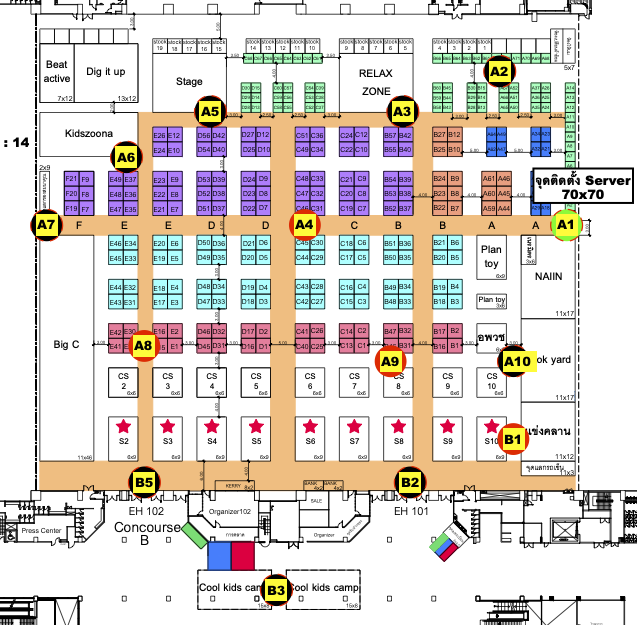

In [ ]:
img = Image.open('plan_abk25_beacon_map.png')
display(img)

# Data Preparation

## test

In [ ]:
testdf = df[['address', 'date', 'time', 'hours', 'alias']][df.address == '80:47:86:d4:11:6d']

In [ ]:
testdf.head()

,address,date,time,hours,alias
2129485,80:47:86:d4:11:6d,2023-06-29,00:40,0,A1
2129486,80:47:86:d4:11:6d,2023-06-29,00:41,0,A1
2129487,80:47:86:d4:11:6d,2023-06-29,00:42,0,A1
2129488,80:47:86:d4:11:6d,2023-06-29,00:43,0,A1
2129489,80:47:86:d4:11:6d,2023-06-29,00:44,0,A1


In [ ]:
result_df = testdf.groupby(testdf.columns.difference(['alias']).tolist())['alias'].apply(' U '.join).reset_index()

In [ ]:
result_df.head()

,address,date,hours,time,alias
0,80:47:86:d4:11:6d,2023-06-29,0,00:40,A1
1,80:47:86:d4:11:6d,2023-06-29,0,00:41,A1
2,80:47:86:d4:11:6d,2023-06-29,0,00:42,A1
3,80:47:86:d4:11:6d,2023-06-29,0,00:43,A1
4,80:47:86:d4:11:6d,2023-06-29,0,00:44,A1


In [ ]:
def categorize_time(hour):

    if 5 <= hour < 9:
        return '00 (early morning)'
    elif 9 <= hour < 12:
        return '01 (late morning)'
    elif 12 <= hour < 16:
        return '02 (afternoon)'
    elif 16 <= hour < 18:
        return '03 (evening)'
    elif 18 <= hour < 24:
        return '04 (night)'
    else:
        return '05 (after midnight)'

def categorize_date(date):

    if date == '2023-06-28':
        return '1st Day'
    elif date == '2023-06-29':
        return '2nd Day'
    elif date == '2023-06-30':
        return '3rd Day'
    elif date == '2023-07-01':
        return '4th Day'
    elif date == '2023-07-02':
        return '5th Day (Last day)'

In [ ]:
result_df['hours'] = result_df['hours'].apply(categorize_time)
result_df['date'] = result_df['date'].apply(categorize_date)

In [ ]:
result_df = result_df[['address', 'date', 'hours', 'alias']]

In [ ]:
result_df.head()

,address,date,hours,alias
0,80:47:86:d4:11:6d,2nd Day,05 (after midnight),A1
1,80:47:86:d4:11:6d,2nd Day,05 (after midnight),A1
2,80:47:86:d4:11:6d,2nd Day,05 (after midnight),A1
3,80:47:86:d4:11:6d,2nd Day,05 (after midnight),A1
4,80:47:86:d4:11:6d,2nd Day,05 (after midnight),A1


In [ ]:
result_df.value_counts().sort_index()

address            date                hours                alias       
80:47:86:d4:11:6d  2nd Day             00 (early morning)   A4               65
                                                            B3              174
                                                            B3 U A4           1
                                       01 (late morning)    A4              148
                                                            A4 U B2           1
                                                            B2               31
                                       02 (afternoon)       B2               83
                                       05 (after midnight)  A1              214
                                                            A1 U B3           1
                                                            B3               45
                   3rd Day             00 (early morning)   A3              176
                                               

In [ ]:
new_result_df = result_df.drop_duplicates()

In [ ]:
new_result_df['time_spend'] = result_df[['address', 'date', 'hours', 'alias']].value_counts().sort_index().to_list()

In [ ]:
new_result_df.head()

,address,date,hours,alias,time_spend
0,80:47:86:d4:11:6d,2nd Day,05 (after midnight),A1,65
214,80:47:86:d4:11:6d,2nd Day,05 (after midnight),A1 U B3,174
215,80:47:86:d4:11:6d,2nd Day,05 (after midnight),B3,1
260,80:47:86:d4:11:6d,2nd Day,00 (early morning),B3,148
434,80:47:86:d4:11:6d,2nd Day,00 (early morning),B3 U A4,1


In [ ]:
def categorize_timespend(minutes):

    if minutes == 1:
        return 'less than 1 minute'
    elif 1 < minutes < 60:
        return 'less than 1 hour'
    elif 60 <= minutes < 120:
        return 'between 1 to 2 hours'
    elif 120 <= minutes < 180:
        return 'between 2 to 3 hours'
    else:
        return 'more than 3 hours'

In [ ]:
new_result_df['time_spend'] = new_result_df['time_spend'].apply(categorize_timespend)

In [ ]:
new_result_df = new_result_df[['address', 'alias', 'time_spend', 'date', 'hours']]

In [ ]:
new_result_df.head()

,address,alias,time_spend,date,hours
0,80:47:86:d4:11:6d,A1,between 1 to 2 hours,2nd Day,05 (after midnight)
214,80:47:86:d4:11:6d,A1 U B3,between 2 to 3 hours,2nd Day,05 (after midnight)
215,80:47:86:d4:11:6d,B3,less than 1 minute,2nd Day,05 (after midnight)
260,80:47:86:d4:11:6d,B3,between 2 to 3 hours,2nd Day,00 (early morning)
434,80:47:86:d4:11:6d,B3 U A4,less than 1 minute,2nd Day,00 (early morning)


## Apply test method to whole dataset

## Relation Data

In [ ]:
df = df[['address', 'date', 'time', 'hours', 'alias']]

In [ ]:
result_df = df.groupby(df.columns.difference(['alias']).tolist())['alias'].apply(' U '.join).reset_index()

In [ ]:
result_df['hours'] = result_df['hours'].apply(categorize_time)
result_df['date'] = result_df['date'].apply(categorize_date)

In [ ]:
result_df = result_df[['address', 'date', 'hours', 'alias']]

In [ ]:
new_result_df = result_df.drop_duplicates()

In [ ]:
new_result_df['time_spend'] = result_df[['address', 'date', 'hours', 'alias']].value_counts().sort_index().to_list()

In [ ]:
new_result_df['time_spend'] = new_result_df['time_spend'].apply(categorize_timespend)

In [ ]:
new_result_df = new_result_df[['address', 'alias', 'time_spend', 'date', 'hours']]

In [ ]:
def remove_hour_order(string):

  if string == '00 (early morning)':
    return 'early morning'
  elif string == '01 (late morning)':
    return 'late morning'
  elif string == '02 (afternoon)':
    return 'afternoon'
  elif string == '03 (evening)':
    return 'evening'
  elif string == '04 (night)':
    return 'night'
  else:
    return 'after midnight'

In [ ]:
new_result_df['hours'] = new_result_df['hours'].apply(remove_hour_order)

In [ ]:
len(new_result_df)

571993

In [ ]:
new_result_df.head()

,address,alias,time_spend,date,hours
0,00:00:00:00:00:00,A6,less than 1 minute,3rd Day,after midnight
1,00:00:00:00:00:00,B1,less than 1 minute,3rd Day,afternoon
2,00:00:00:00:00:00,B5,less than 1 minute,4th Day,after midnight
4,00:00:00:00:00:00,B5,less than 1 hour,4th Day,early morning
5,00:00:00:00:00:00,A5,less than 1 minute,5th Day (Last day),after midnight


In [ ]:
new_result_df.to_csv('relation_data.csv', sep=',', encoding='utf-8', index=False)
files.download('relation_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Perform Association Rule in RapidMiner

...